In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df = pd.read_csv("weather.csv")
display(df.head())

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,...,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES
0,USW00014918,"INTERNATIONAL FALLS INTERNATIONAL AIRPORT, MN US",48.55943,-93.39554,352.6,2015-04-02,6.9,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014918,"INTERNATIONAL FALLS INTERNATIONAL AIRPORT, MN US",48.55943,-93.39554,352.6,2015-04-03,4.2,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014918,"INTERNATIONAL FALLS INTERNATIONAL AIRPORT, MN US",48.55943,-93.39554,352.6,2015-04-04,4.0,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014918,"INTERNATIONAL FALLS INTERNATIONAL AIRPORT, MN US",48.55943,-93.39554,352.6,2015-04-05,1.9,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014918,"INTERNATIONAL FALLS INTERNATIONAL AIRPORT, MN US",48.55943,-93.39554,352.6,2015-04-06,2.5,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN


In [2]:
x = df.columns
display(x)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT08', 'WT08_ATTRIBUTES', 'WT09', 'WT09_ATTRIBUTES'],
      dtype='object')

In [3]:
unnecessary_columns = [
    'STATION', 'NAME', 'AWND_ATTRIBUTES', 'PGTM_ATTRIBUTES', 'PRCP_ATTRIBUTES', 
    'SNOW_ATTRIBUTES', 'SNWD_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 
    'TMIN_ATTRIBUTES', 'WDF2_ATTRIBUTES', 'WDF5_ATTRIBUTES', 'WSF2_ATTRIBUTES', 
    'WSF5_ATTRIBUTES', 'WT01_ATTRIBUTES', 'WT02_ATTRIBUTES', 'WT03_ATTRIBUTES', 
    'WT04_ATTRIBUTES', 'WT05_ATTRIBUTES', 'WT06_ATTRIBUTES', 'WT08_ATTRIBUTES', 
    'WT09_ATTRIBUTES'
]

In [4]:
df = df.drop(columns=unnecessary_columns, errors='ignore')
display(df.head())

,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,48.55943,-93.39554,352.6,2015-04-02,6.9,NaN,0.5,0.0,0.0,7.7,...,13.0,18.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48.55943,-93.39554,352.6,2015-04-03,4.2,NaN,0.0,0.0,0.0,-4.5,...,9.8,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48.55943,-93.39554,352.6,2015-04-04,4.0,NaN,0.0,0.0,0.0,-3.6,...,8.9,12.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48.55943,-93.39554,352.6,2015-04-05,1.9,NaN,0.0,0.0,0.0,-4.8,...,5.8,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48.55943,-93.39554,352.6,2015-04-06,2.5,NaN,0.0,0.0,0.0,-1.8,...,6.7,8.5,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [5]:
selected_columns = ['LATITUDE', 'LONGITUDE', 'ELEVATION', 'AWND', 'PRCP', 'SNOW', 
                    'SNWD', 'TAVG', 'TMAX', 'TMIN','DATE']

In [6]:
df_cleaned = df[selected_columns]
df_cleaned.to_csv("cleaned_weather_data.csv", index=False)
display(df_cleaned)

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,DATE
0,48.55943,-93.39554,352.6,6.9,0.5,0.0,0.0,7.7,11.7,-3.8,2015-04-02
1,48.55943,-93.39554,352.6,4.2,0.0,0.0,0.0,-4.5,-0.5,-9.9,2015-04-03
2,48.55943,-93.39554,352.6,4.0,0.0,0.0,0.0,-3.6,1.7,-10.5,2015-04-04
3,48.55943,-93.39554,352.6,1.9,0.0,0.0,0.0,-4.8,3.3,-13.8,2015-04-05
4,48.55943,-93.39554,352.6,2.5,0.0,0.0,0.0,-1.8,3.3,-7.1,2015-04-06
...,...,...,...,...,...,...,...,...,...,...,...
3647,48.55943,-93.39554,352.6,3.2,0.0,0.0,80.0,1.5,3.3,-3.2,2025-03-27
3648,48.55943,-93.39554,352.6,4.7,5.3,0.0,50.0,-0.1,0.6,-3.2,2025-03-28
3649,48.55943,-93.39554,352.6,3.7,0.0,0.0,50.0,-2.2,0.6,-3.8,2025-03-29
3650,48.55943,-93.39554,352.6,3.6,0.0,0.0,50.0,-1.2,3.9,-4.9,2025-03-30


In [7]:
df_cleaned = df_cleaned.dropna(subset=['TAVG'])
display(df_cleaned)

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,DATE
0,48.55943,-93.39554,352.6,6.9,0.5,0.0,0.0,7.7,11.7,-3.8,2015-04-02
1,48.55943,-93.39554,352.6,4.2,0.0,0.0,0.0,-4.5,-0.5,-9.9,2015-04-03
2,48.55943,-93.39554,352.6,4.0,0.0,0.0,0.0,-3.6,1.7,-10.5,2015-04-04
3,48.55943,-93.39554,352.6,1.9,0.0,0.0,0.0,-4.8,3.3,-13.8,2015-04-05
4,48.55943,-93.39554,352.6,2.5,0.0,0.0,0.0,-1.8,3.3,-7.1,2015-04-06
...,...,...,...,...,...,...,...,...,...,...,...
3647,48.55943,-93.39554,352.6,3.2,0.0,0.0,80.0,1.5,3.3,-3.2,2025-03-27
3648,48.55943,-93.39554,352.6,4.7,5.3,0.0,50.0,-0.1,0.6,-3.2,2025-03-28
3649,48.55943,-93.39554,352.6,3.7,0.0,0.0,50.0,-2.2,0.6,-3.8,2025-03-29
3650,48.55943,-93.39554,352.6,3.6,0.0,0.0,50.0,-1.2,3.9,-4.9,2025-03-30


In [8]:
# Get only numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns
# Fill NaNs in numeric columns with their median values
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())
display(df_cleaned)

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,DATE
0,48.55943,-93.39554,352.6,6.9,0.5,0.0,0.0,7.7,11.7,-3.8,2015-04-02
1,48.55943,-93.39554,352.6,4.2,0.0,0.0,0.0,-4.5,-0.5,-9.9,2015-04-03
2,48.55943,-93.39554,352.6,4.0,0.0,0.0,0.0,-3.6,1.7,-10.5,2015-04-04
3,48.55943,-93.39554,352.6,1.9,0.0,0.0,0.0,-4.8,3.3,-13.8,2015-04-05
4,48.55943,-93.39554,352.6,2.5,0.0,0.0,0.0,-1.8,3.3,-7.1,2015-04-06
...,...,...,...,...,...,...,...,...,...,...,...
3647,48.55943,-93.39554,352.6,3.2,0.0,0.0,80.0,1.5,3.3,-3.2,2025-03-27
3648,48.55943,-93.39554,352.6,4.7,5.3,0.0,50.0,-0.1,0.6,-3.2,2025-03-28
3649,48.55943,-93.39554,352.6,3.7,0.0,0.0,50.0,-2.2,0.6,-3.8,2025-03-29
3650,48.55943,-93.39554,352.6,3.6,0.0,0.0,50.0,-1.2,3.9,-4.9,2025-03-30


In [9]:
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])
df_cleaned['Year'] = df_cleaned['DATE'].dt.year
df_cleaned['Month'] = df_cleaned['DATE'].dt.month
df_cleaned['Day'] = df_cleaned['DATE'].dt.day
display(df_cleaned.head())

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,DATE,Year,Month,Day
0,48.55943,-93.39554,352.6,6.9,0.5,0.0,0.0,7.7,11.7,-3.8,2015-04-02,2015,4,2
1,48.55943,-93.39554,352.6,4.2,0.0,0.0,0.0,-4.5,-0.5,-9.9,2015-04-03,2015,4,3
2,48.55943,-93.39554,352.6,4.0,0.0,0.0,0.0,-3.6,1.7,-10.5,2015-04-04,2015,4,4
3,48.55943,-93.39554,352.6,1.9,0.0,0.0,0.0,-4.8,3.3,-13.8,2015-04-05,2015,4,5
4,48.55943,-93.39554,352.6,2.5,0.0,0.0,0.0,-1.8,3.3,-7.1,2015-04-06,2015,4,6


In [10]:
df_cleaned = df_cleaned.drop(columns=['DATE'])
display(df_cleaned.head())

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Year,Month,Day
0,48.55943,-93.39554,352.6,6.9,0.5,0.0,0.0,7.7,11.7,-3.8,2015,4,2
1,48.55943,-93.39554,352.6,4.2,0.0,0.0,0.0,-4.5,-0.5,-9.9,2015,4,3
2,48.55943,-93.39554,352.6,4.0,0.0,0.0,0.0,-3.6,1.7,-10.5,2015,4,4
3,48.55943,-93.39554,352.6,1.9,0.0,0.0,0.0,-4.8,3.3,-13.8,2015,4,5
4,48.55943,-93.39554,352.6,2.5,0.0,0.0,0.0,-1.8,3.3,-7.1,2015,4,6


In [11]:
X = df_cleaned.drop('TAVG', axis=1)
y = df_cleaned['TAVG']

In [12]:
display(X.head())

,LATITUDE,LONGITUDE,ELEVATION,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,Year,Month,Day
0,48.55943,-93.39554,352.6,6.9,0.5,0.0,0.0,11.7,-3.8,2015,4,2
1,48.55943,-93.39554,352.6,4.2,0.0,0.0,0.0,-0.5,-9.9,2015,4,3
2,48.55943,-93.39554,352.6,4.0,0.0,0.0,0.0,1.7,-10.5,2015,4,4
3,48.55943,-93.39554,352.6,1.9,0.0,0.0,0.0,3.3,-13.8,2015,4,5
4,48.55943,-93.39554,352.6,2.5,0.0,0.0,0.0,3.3,-7.1,2015,4,6


In [13]:
display(y.head())

0    7.7
1   -4.5
2   -3.6
3   -4.8
4   -1.8
Name: TAVG, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression:")
print(f"  Accuracy (R²) = {lr_r2 * 100:.2f}%")
print(f"  MSE = {lr_mse:.2f}")
print(f"  MAE = {lr_mae:.2f}\n")


Linear Regression:
  Accuracy (R²) = 98.53%
  MSE = 2.35
  MAE = 1.16



In [16]:
import matplotlib.pyplot as plt

date_subset = X_test.iloc[:15].copy()
date_subset['TAVG'] = y_test.iloc[:15].values

timestamps = [f"{int(row['Year'])}-{int(row['Month']):02d}-{int(row['Day']):02d}" for _, row in date_subset.iterrows()]
display(timestamps)

['2019-11-30',
 '2019-02-17',
 '2018-03-11',
 '2017-01-31',
 '2020-02-05',
 '2022-03-05',
 '2015-10-03',
 '2017-05-28',
 '2015-05-04',
 '2017-07-20',
 '2019-10-11',
 '2023-01-17',
 '2018-01-21',
 '2018-09-08',
 '2019-05-13']

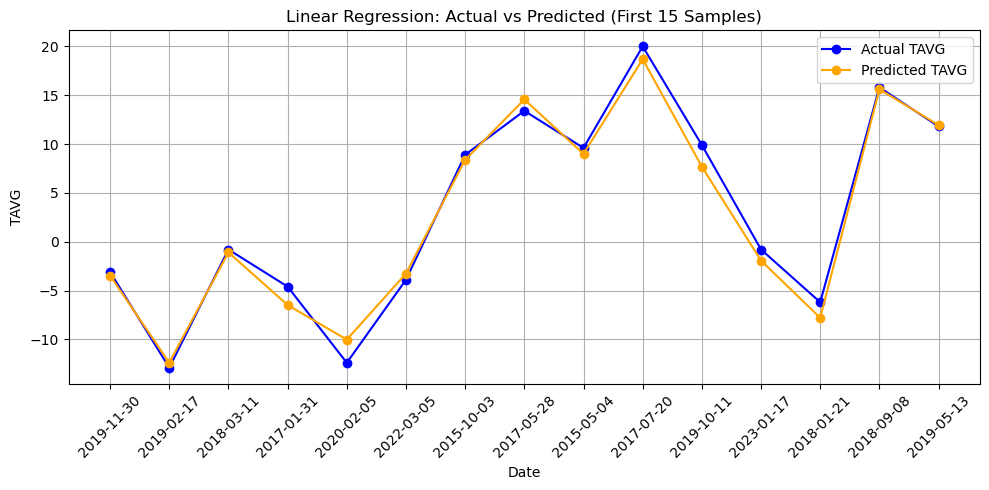

In [17]:
# Predictions
y_test_subset = y_test.iloc[:15].values
lr_pred_subset = lr_pred[:15]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(timestamps, y_test_subset, label='Actual TAVG', marker='o', color='blue')
plt.plot(timestamps, lr_pred_subset, label='Predicted TAVG', marker='o', color='orange')
plt.title('Linear Regression: Actual vs Predicted (First 15 Samples)')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor:")
print(f"  Accuracy (R²) = {rf_r2 * 100:.2f}%")
print(f"  MSE = {rf_mse:.2f}")
print(f"  MAE = {rf_mae:.2f}\n")


Random Forest Regressor:
  Accuracy (R²) = 98.52%
  MSE = 2.36
  MAE = 1.15



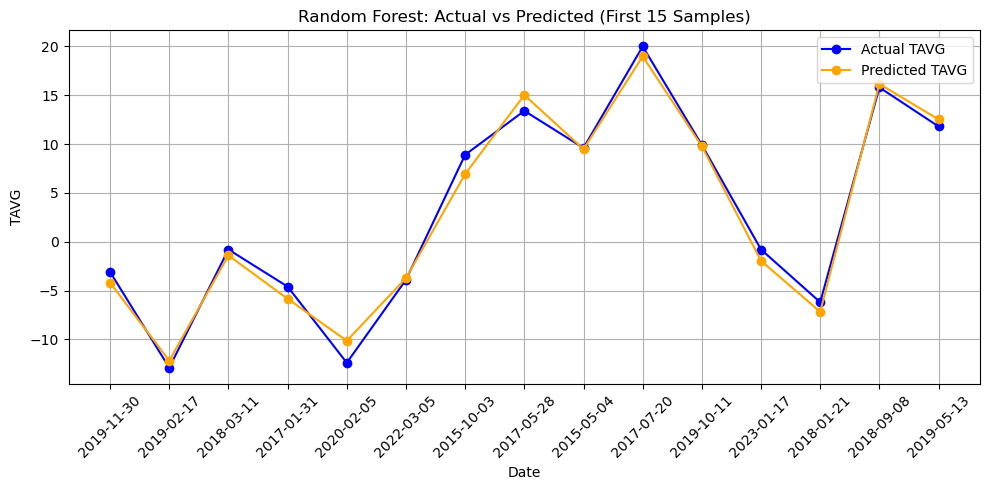

In [19]:
rf_pred_subset = rf_pred[:15]

plt.figure(figsize=(10, 5))
plt.plot(timestamps, y_test_subset, label='Actual TAVG', marker='o', color='blue')
plt.plot(timestamps, rf_pred_subset, label='Predicted TAVG', marker='o', color='orange')
plt.title('Random Forest: Actual vs Predicted (First 15 Samples)')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predict
knn_pred = knn_model.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print("K-Nearest Neighbors Regressor:")
print(f"  Accuracy (R²) = {knn_r2 * 100:.2f}%")
print(f"  MSE = {knn_mse:.2f}")
print(f"  MAE = {knn_mae:.2f}\n")


K-Nearest Neighbors Regressor:
  Accuracy (R²) = 95.93%
  MSE = 6.50
  MAE = 1.78



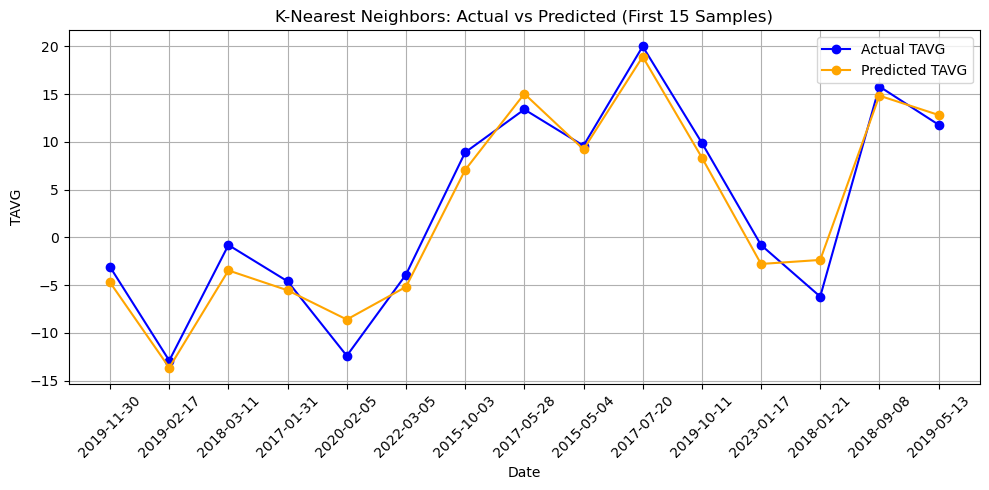

In [21]:
knn_pred_subset = knn_pred[:15]

plt.figure(figsize=(10, 5))
plt.plot(timestamps, y_test_subset, label='Actual TAVG', marker='o', color='blue')
plt.plot(timestamps, knn_pred_subset, label='Predicted TAVG', marker='o', color='orange')
plt.title('K-Nearest Neighbors: Actual vs Predicted (First 15 Samples)')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict
svr_pred = svr_model.predict(X_test)

# Evaluate
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regressor:")
print(f"  Accuracy (R²) = {svr_r2 * 100:.2f}%")
print(f"  MSE = {svr_mse:.2f}")
print(f"  MAE = {svr_mae:.2f}\n")


Support Vector Regressor:
  Accuracy (R²) = 47.44%
  MSE = 83.91
  MAE = 7.53



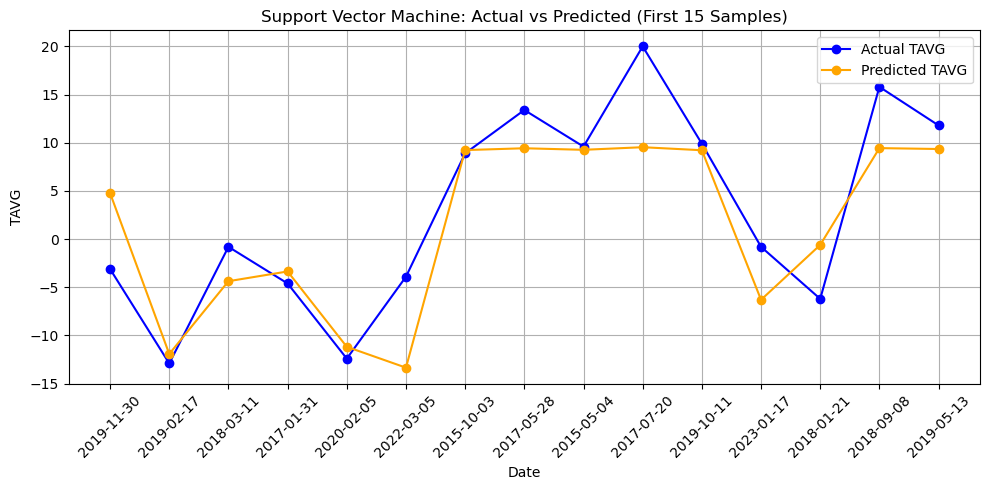

In [23]:
svm_pred_subset = svr_pred[:15]

plt.figure(figsize=(10, 5))
plt.plot(timestamps, y_test_subset, label='Actual TAVG', marker='o', color='blue')
plt.plot(timestamps, svm_pred_subset, label='Predicted TAVG', marker='o', color='orange')
plt.title('Support Vector Machine: Actual vs Predicted (First 15 Samples)')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np
print("Training on features:", X.columns) 

Training on features: Index(['LATITUDE', 'LONGITUDE', 'ELEVATION', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TMAX', 'TMIN', 'Year', 'Month', 'Day'],
      dtype='object')


In [25]:
# Retrain the model
best_model = LinearRegression()
best_model.fit(X, y)  # Important!

sunny_input = np.array([[48.55943, -93.39554, 352.6, 8.6,
                         68.1, 325.0, 660.0, 36.7, 21.7,
                         2025, 12, 31]])
rainy_input = np.array([[48.55943, -93.39554, 352.6, 4.5,
                         12.0, 0.0, 0.0, 22.0, 18.0,
                         2025, 7, 10]])

cold_input = np.array([[48.55943, -93.39554, 352.6, 3.0,
                         0.0, 20.0, 25.0, -5.0, -15.0,
                         2025, 1, 5]])
def temp_emoji(temp):
    if temp >= 25:
        return "☀️"
    elif temp <= 10:
        return "❄️"
    else:
        return "🌧️"

In [26]:
# Predict
for label, input_array in zip(['Sunny', 'Rainy', 'Cold'], 
                              [sunny_input, rainy_input, cold_input]):
    predicted_tavg = best_model.predict(input_array)[0]
    print(f"{label} Day Prediction: {predicted_tavg:.2f}°C {temp_emoji(predicted_tavg)}")


Sunny Day Prediction: 30.54°C ☀️
Rainy Day Prediction: 20.34°C 🌧️
Cold Day Prediction: -9.54°C ❄️


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
